## Task-2

## Project Title:- Predicting Test Score of a Student based on total hours of Study using Supervised Machine Learning



### Importing  libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

### Data 

In [3]:
url="http://bit.ly/w-data"
raw_data=pd.read_csv(url)
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [4]:
raw_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
y=raw_data['Scores']
x=raw_data['Hours']

Text(0.5, 1.0, 'No of hours of study vs score')

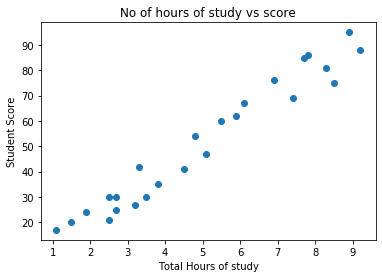

In [8]:
plt.scatter(x,y)
plt.xlabel('Total Hours of study')
plt.ylabel('Student Score')
plt.title('No of hours of study vs score')

### Split the data into training and testing sets

In [9]:
X=np.array(x).reshape(-1,1)
Y=np.array(y).reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.8,random_state=42)

### Fitting the model using Linear Regression

In [10]:
score_model=LinearRegression()
score_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Result

In [13]:
r2=score_model.score(X_train,Y_train)
rc=score_model.coef_
intercept=score_model.intercept_
print("Model result")
reg_results = pd.DataFrame({'R2': r2, 'coefficient': rc.flatten(),'intercept':intercept.flatten()})
reg_results

Model result


,R2,coefficient,intercept
0,0.967744,8.981831,8.292283


###  Visulalizing Regression Line

Text(0.5, 1.0, 'Total hours of study vs Student test score')

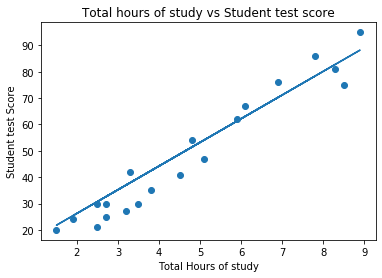

In [14]:
result=rc*X_test + intercept
plt.scatter(X_test,Y_test)
plt.plot(X_test,result)
plt.xlabel('Total Hours of study')
plt.ylabel('Student test Score')
plt.title('Total hours of study vs Student test score')

### Residual in Regression Analysis

In [15]:
y_predicted=score_model.predict(X_test)
predicted = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_predicted.flatten()})  
pred_10=predicted.head(10)
pred_10

,Actual,Predicted
0,81,82.841482
1,30,30.746861
2,21,30.746861
3,76,70.266918
4,62,61.285087
5,25,32.543228
6,42,37.932326
7,47,54.099622
8,35,42.423242
9,20,21.765030


### Residual Visualization

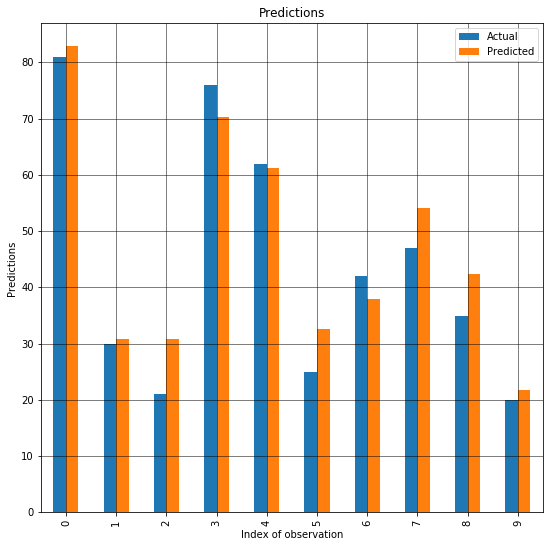

In [23]:
pred_10.plot(kind='bar',figsize=(9,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Index of observation')
plt.ylabel('Predictions')
plt.title('Predictions')
plt.show()

# What will be predicted score if a student study for 9.25 hrs in a day?

### Predicting score

In [17]:
hours=float(input('Enter number of hours of study  '))

Enter number of hours of study  9.25


In [18]:
score=score_model.predict(np.array(hours).reshape(1,-1))
print('The predicted score for {} hours of study is : {}'.format(hours,score.flatten()[0]))

The predicted score for 9.25 hours of study is : 91.37422170052056


### Model performance evaluation

In [19]:
mse=metrics.mean_absolute_error(Y_test, y_predicted)

print('Mean Aboslute Error is :',mse)

Mean Aboslute Error is : 5.431325916096766
